In [1]:
from tip_finding import tip_finding
from drive import segment_points
import pickle

In [2]:
import numpy as np
import pandas as pd

In [3]:
root_id = 864691135909994000
good_tips_thick, good_tips_thin, good_tips_bad_thick, good_tips_bad_thin, just_tips, just_means  = tip_finding.endpoints_from_rid(root_id)
endpoints = np.concatenate([good_tips_thick, good_tips_thin])
endpoints

branch


100%|██████████| 7992/7992 [00:00<00:00, 253343.39it/s]
/Users/RupaChalavadi/Desktop/CRIMSON/Summer/Campfire/campfire/tip_finding/tip_finding.py:516: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  locs = np.array([np.array(list(nx.get_node_attributes(g, 'mean_loc').values())) for g in graphs])
100%|██████████| 4/4 [00:00<00:00, 149.74it/s]
2it [00:00, 22.04it/s]
0it [00:00, ?it/s]


array([[1611894.59016393,  916850.24590164,  942102.        ],
       [1610157.66666667,  915415.        ,  959658.        ]])

In [4]:
endpoints[0]

array([1611894.59016393,  916850.24590164,  942102.        ])

In [5]:
ext, num = segment_points(endpoint = endpoints[0], root_id = root_id, point_id = 0, resolution=[4,4,40])

Ext Time 4.9484779834747314
[1611894.59016393  916850.24590164  942102.        ]
[402973.64754098 229212.56147541  23552.55      ]
[402673, 403273, 228912, 229512, 23522, 23582]
Bounds Time 0.0005030632019042969
EMPTY VOLUME
Membranes Time 0.3277750015258789
Errored out


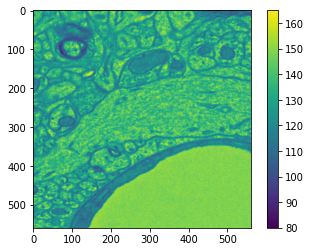

In [21]:
import matplotlib.pyplot as plt

plt.imshow(ext.em[...,0])
plt.colorbar()


In [8]:
from agents import scripts

AttributeError: 'NoneType' object has no attribute 'shape'

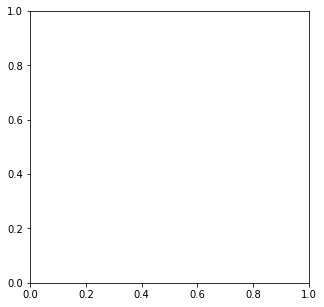

In [9]:
%matplotlib inline
scripts.multi_slice_viewer(ext.seg)

In [25]:
endpoints[0]/[4,4,40]

array([402973.64754098, 229212.56147541,  23552.55      ])

In [6]:
pickle.dump([good_tips_thick, good_tips_thin], open("tips.pkl", "wb"))